In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [2]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [3]:
df=df.drop_duplicates()
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [4]:
df.price_per_sqft.mean()

8132.641840177763

In [5]:
#Percentile method
percentile_25=df.price_per_sqft.quantile(.25)
percentile_75=df.price_per_sqft.quantile(.75)
percentile_25,percentile_75

(4312.0, 7461.0)

In [6]:
non_numeric_values = df['price_per_sqft'][pd.to_numeric(df['price_per_sqft'], errors='coerce').isna()]
non_numeric_values

Series([], Name: price_per_sqft, dtype: int64)

In [7]:
q1=df.price_per_sqft.quantile(.25)
q3=df.price_per_sqft.quantile(.75)
q1,q3

(4312.0, 7461.0)

In [8]:
#Find IQR
iqr=q3 - q1
iqr

3149.0

In [9]:
#lower whisker
lw=q1-1.5*iqr
lw

-411.5

In [10]:
#upper whisker
uw=q3+1.5*iqr
uw

12184.5

In [11]:
df = df[(df['price_per_sqft'] >= lw) & (df['price_per_sqft'] <= uw)]
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [12]:
from scipy import stats
z_scores = stats.zscore(df['price_per_sqft'])
df = df[(z_scores >= -3) & (z_scores <= 3)]

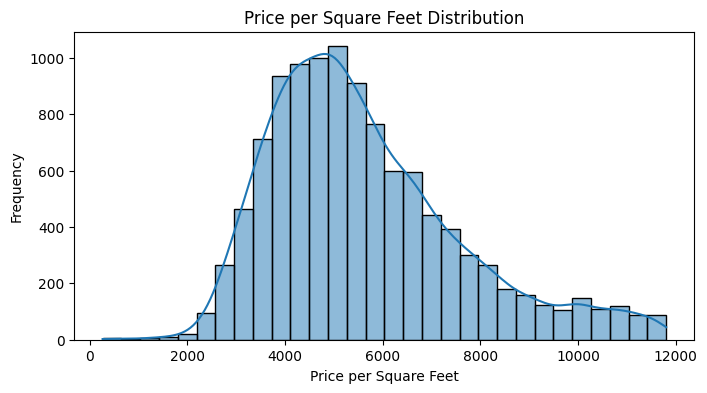

In [13]:
#Histogram plot
plt.figure(figsize=(8, 4))
sns.histplot(df['price_per_sqft'], bins=30, kde=True)
plt.xlabel('Price per Square Feet')
plt.ylabel('Frequency')
plt.title('Price per Square Feet Distribution')
plt.show()

In [14]:
# Calculate Z-scores
z_scores = stats.zscore(df['price_per_sqft'])

# Identify and remove outliers using Z-scores
df = df[(z_scores >= -3) & (z_scores <= 3)]

<function matplotlib.pyplot.show(close=None, block=None)>

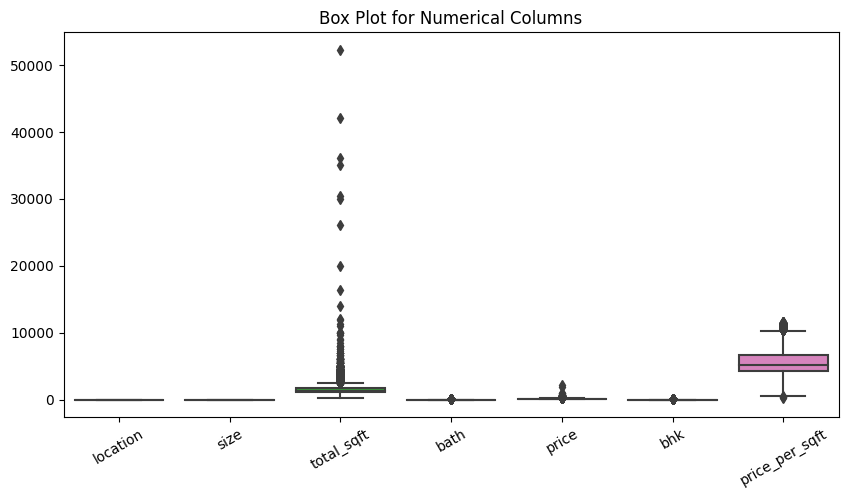

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title('Box Plot for Numerical Columns')
plt.xticks(rotation=30)
plt.show

In [16]:
df['location'] = pd.to_numeric(df['location'], errors='coerce')
df['size'] = pd.to_numeric(df['size'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)
print(df)
print(df.dtypes)


       location  size  total_sqft  bath   price  bhk  price_per_sqft
0           0.0   0.0      1056.0   2.0   39.07    2            3699
1           0.0   0.0      2600.0   5.0  120.00    4            4615
2           0.0   0.0      1440.0   2.0   62.00    3            4305
3           0.0   0.0      1521.0   3.0   95.00    3            6245
4           0.0   0.0      1200.0   2.0   51.00    2            4250
...         ...   ...         ...   ...     ...  ...             ...
13194       0.0   0.0      1715.0   3.0  112.00    3            6530
13195       0.0   0.0      3453.0   4.0  231.00    5            6689
13196       0.0   0.0      3600.0   5.0  400.00    4           11111
13197       0.0   0.0      1141.0   2.0   60.00    2            5258
13198       0.0   0.0      4689.0   4.0  488.00    4           10407

[10862 rows x 7 columns]
location          float64
size              float64
total_sqft        float64
bath              float64
price             float64
bhk             

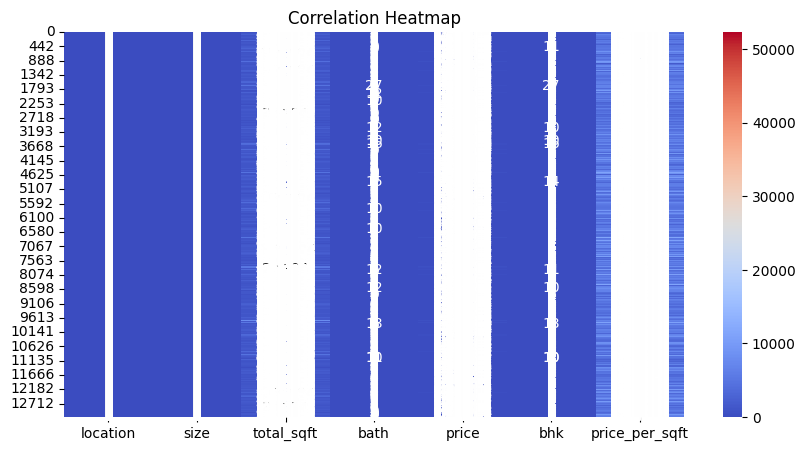

In [24]:
#Heatmap to find correlation 
plt.figure(figsize=( 10,5))
sns.heatmap(df[['location','size','total_sqft','bath','price','bhk','price_per_sqft']],annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


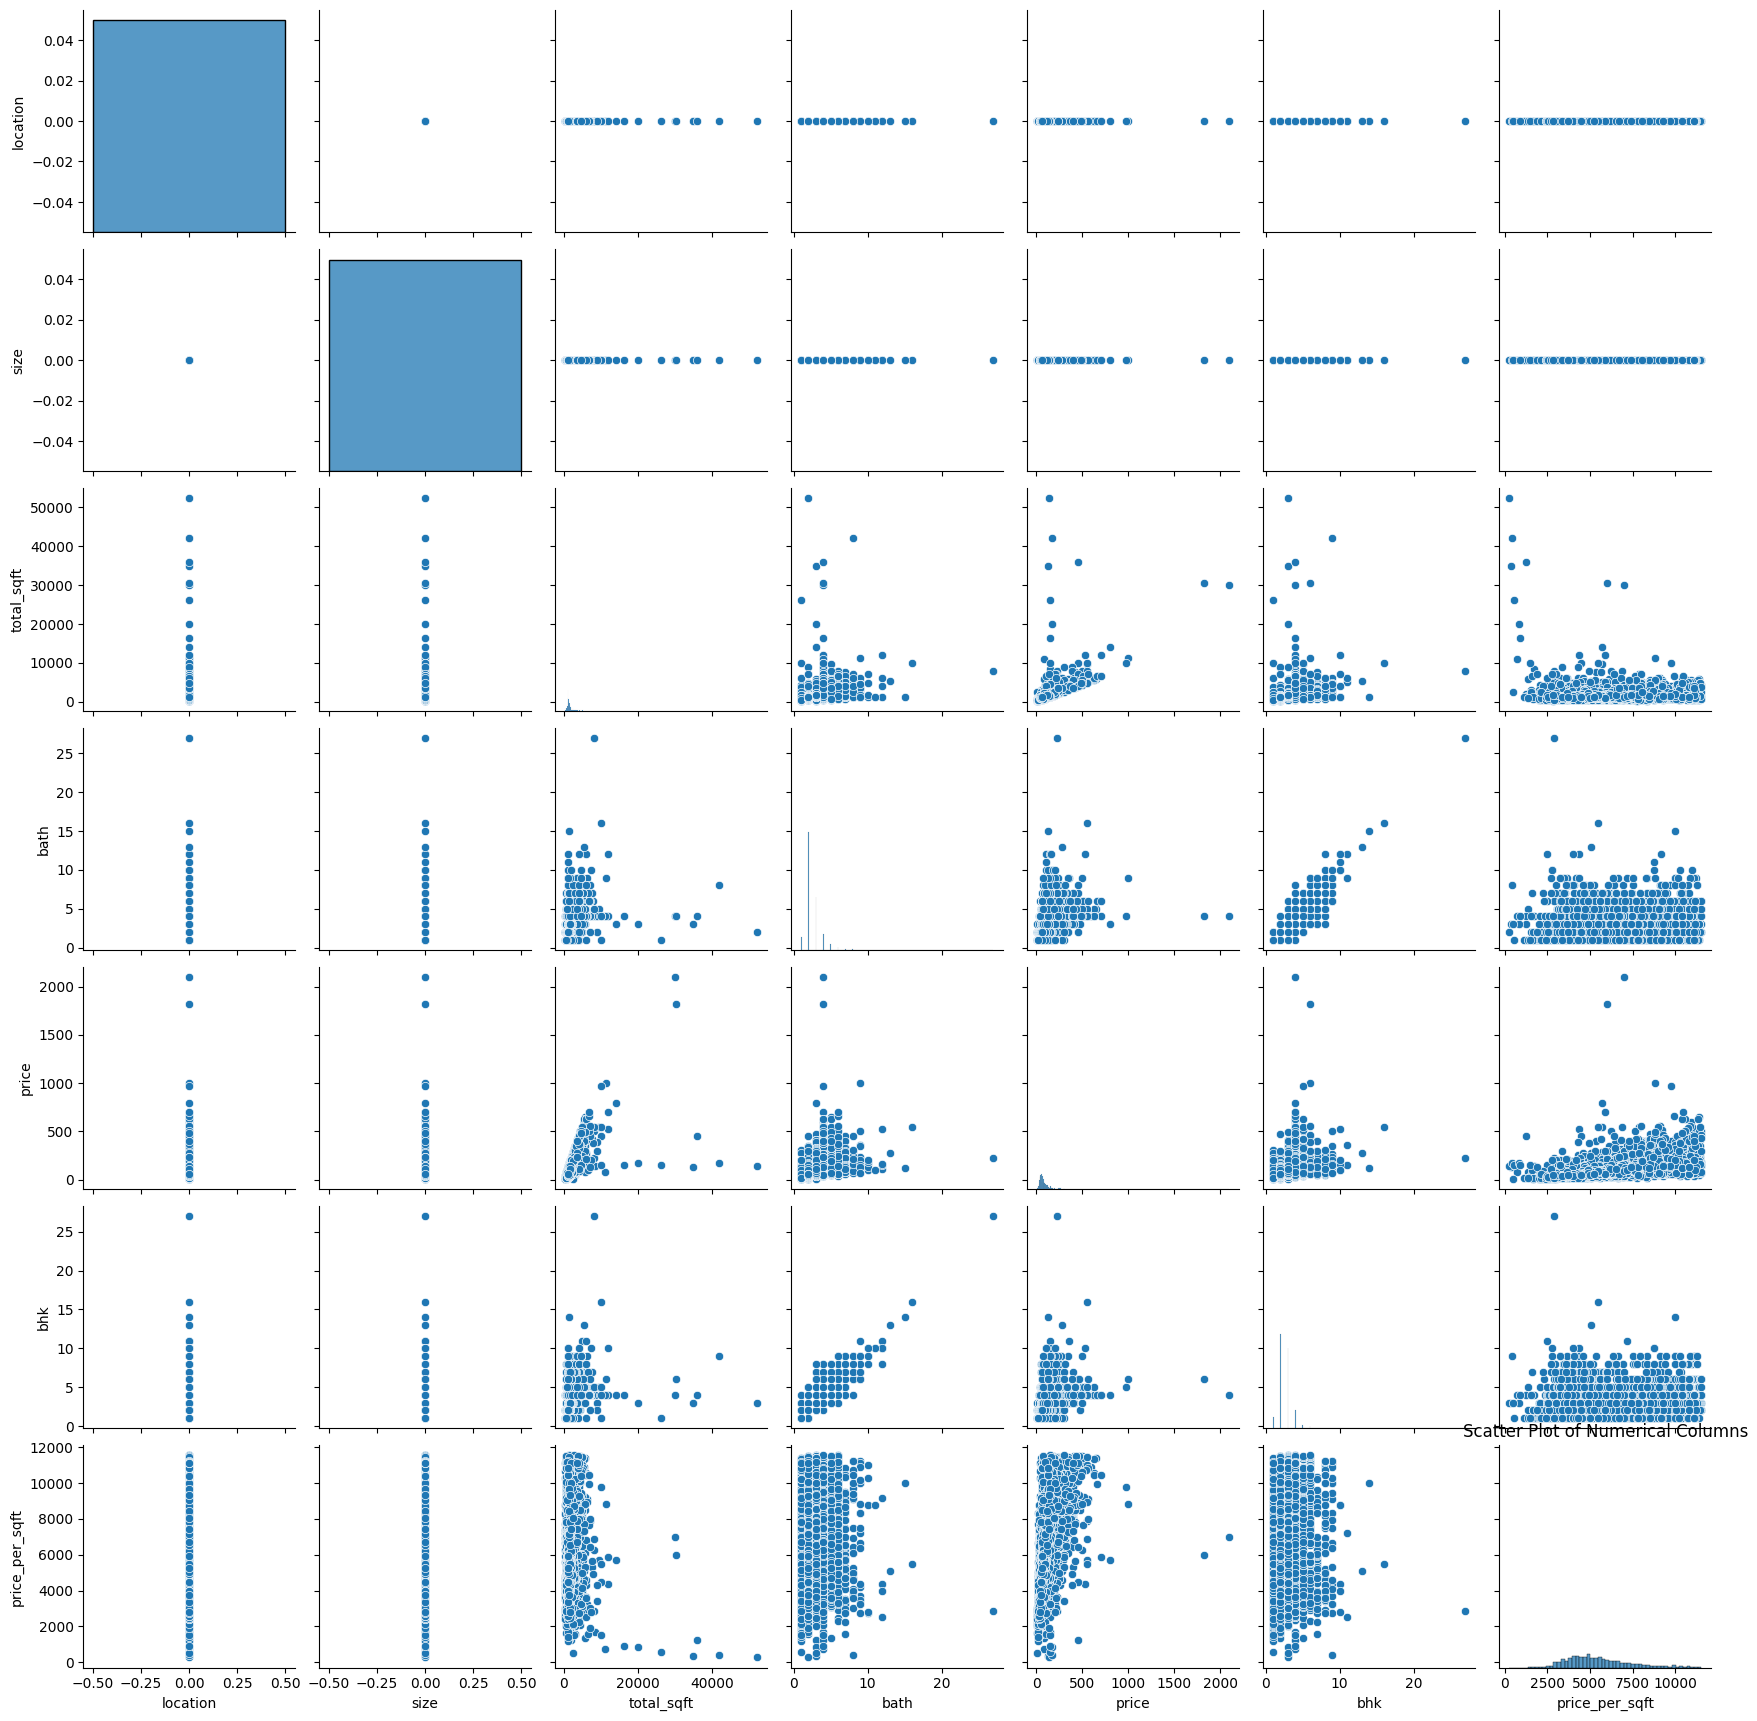

In [22]:
#Pair plot for numerical columns
sns.pairplot(df.select_dtypes(include='number'))
plt.title('Scatter Plot of Numerical Columns')
plt.show()